In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

Lets create some random data

In [2]:
weight = 0.7
bias = 0.3

# y = mx + b baby

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

print(f"Here's what we're looking at. X: {X[:10]}\ny:{y[:10]}")

Here's what we're looking at. X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y:tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [3]:
train_split_amount = int(0.8*len(X)) # using 80% of our 'data'
X_train, y_train = X[:train_split_amount], y[:train_split_amount]
X_test, y_test = X[train_split_amount:], y[train_split_amount:]

print(f"length of training set: {len(X_train)} testing set: {len(X_test)}")

length of training set: 40 testing set: 10


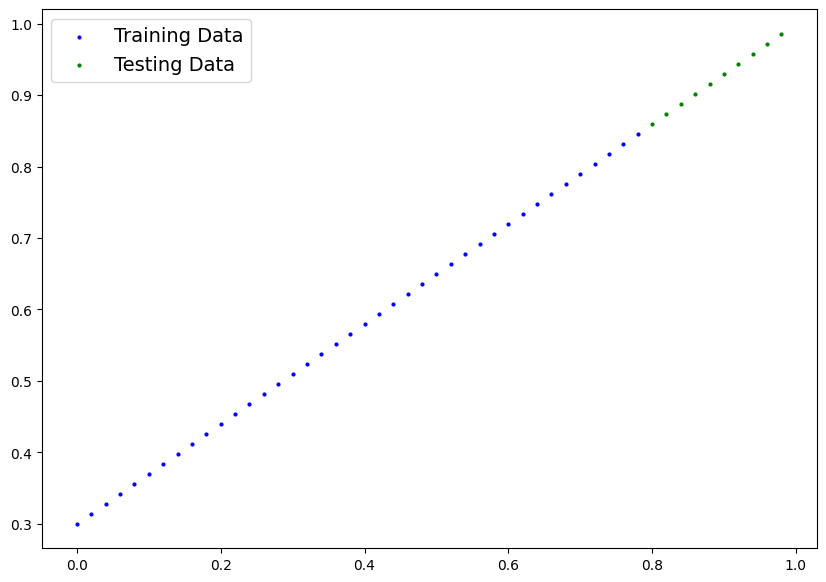

In [4]:
def plot_predictions(train_data: int = X_train, 
        train_labels: int = y_train, 
        test_data: int = X_test ,
        test_labels: int = y_test,
        predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b",s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c="g",s=4, label="Testing Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={'size':14})

plot_predictions()

In [5]:
class LinearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                    dtype=torch.float),
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,
                                    dtype=torch.float),
                                    requires_grad=True)
                                    

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # implement y = mx + b for forward prop
        return self.weights * x + self.bias

In [6]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [7]:
# List named parameters 
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

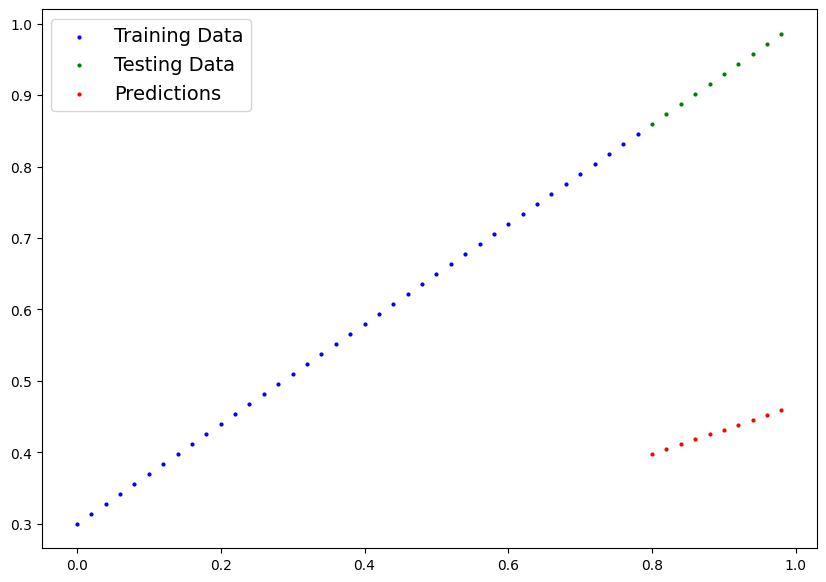

In [8]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)
y_preds
plot_predictions(predictions=y_preds)

In [9]:
mean_absolute_error = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                    lr=0.0001)


In [10]:
torch.manual_seed(42)

epochs = 10000

train_loss_vals = []
test_loss_vals = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = mean_absolute_error(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = mean_absolute_error(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_vals.append(loss.detach().numpy())
            test_loss_vals.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.4944015145301819 
Epoch: 10 | MAE Train Loss: 0.31172919273376465 | MAE Test Loss: 0.49305421113967896 
Epoch: 20 | MAE Train Loss: 0.31057703495025635 | MAE Test Loss: 0.4917070269584656 
Epoch: 30 | MAE Train Loss: 0.30942484736442566 | MAE Test Loss: 0.4903597831726074 
Epoch: 40 | MAE Train Loss: 0.30827268958091736 | MAE Test Loss: 0.48901262879371643 
Epoch: 50 | MAE Train Loss: 0.30712056159973145 | MAE Test Loss: 0.4876653552055359 
Epoch: 60 | MAE Train Loss: 0.30596840381622314 | MAE Test Loss: 0.4863181710243225 
Epoch: 70 | MAE Train Loss: 0.30481624603271484 | MAE Test Loss: 0.48497089743614197 
Epoch: 80 | MAE Train Loss: 0.30366405844688416 | MAE Test Loss: 0.483623743057251 
Epoch: 90 | MAE Train Loss: 0.30251190066337585 | MAE Test Loss: 0.4822765290737152 
Epoch: 100 | MAE Train Loss: 0.30135971307754517 | MAE Test Loss: 0.4809292256832123 
Epoch: 110 | MAE Train Loss: 0.30020755529403687 | MAE Test Los

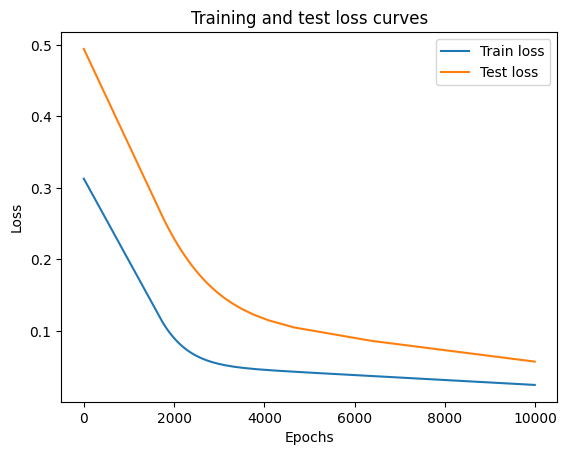

In [11]:
plt.plot(epoch_count, train_loss_vals, label="Train loss")
plt.plot(epoch_count, test_loss_vals, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [12]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5789])), ('bias', tensor([0.3509]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


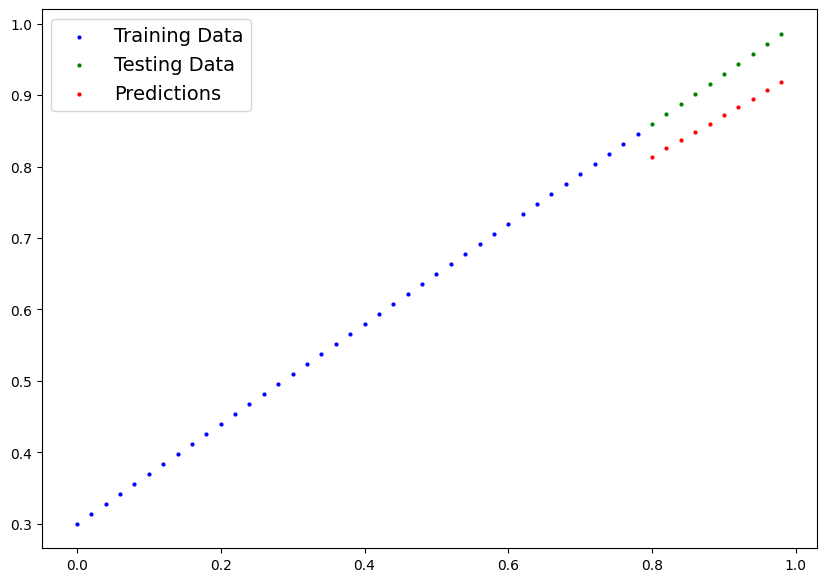

In [13]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds
plot_predictions(predictions=y_preds)

In [14]:
MODEL_PATH = "01_pytorch_workflow_model_0.pth"

torch.save(obj=model_0.state_dict(), f=MODEL_PATH)

model_0.state_dict()

OrderedDict([('weights', tensor([0.5789])), ('bias', tensor([0.3509]))])

In [15]:


# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_PATH))


<All keys matched successfully>

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


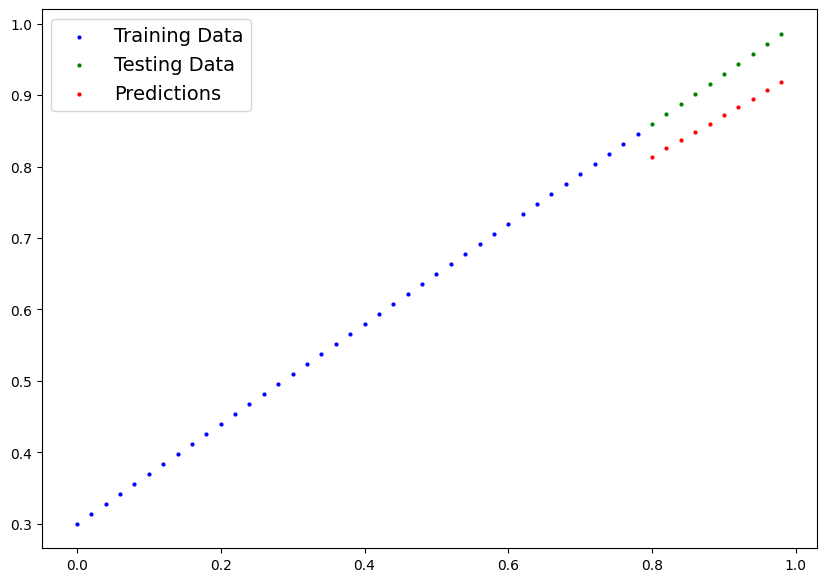

In [16]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds


# Compare previous model predictions with loaded model predictions (these should be the same)
print(y_preds == loaded_model_preds)


plot_predictions(predictions=loaded_model_preds)

In [17]:
# create a linear regression model with nn.Linear

class LinearRegressionModel2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear_layer = torch.nn.Linear(in_features=1, out_features=1)
        
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x) 

torch.manual_seed(42)
model_1 = LinearRegressionModel2()
print(model_1, model_1.state_dict())

LinearRegressionModel2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
) OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_1.to(device=device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [19]:
loss_fn = torch.nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)

## There are three methods of saving a method in Pytorch:

1. torch.save() saves a pickle file of python objects, which can be the model etc.
2. torch.load() allows the loading of a pickled PyTorch object
3. torch.state_dict() saves the state dictionary   